## Моделирование молекулярной динамики

   - Система: ГЦК решётка $7\times7\times7$ частиц;
   - Постоянная решётки: $a = 1.75~\sigma $;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Начальная температура: $T_i = 10^{-10}~\varepsilon / k_B$;
   - Конечная температура: $T_f = 2.8~\varepsilon / k_B$;
   - Скорость охлаждения: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число шагов для охлаждения: 40000;
   - Функция радиального распределения, среднеквадратичное смещение и коэффициенты самодиффузии рассчитывалась через каждые 5000 шагов;
   - Подсчёт состоял из 2499 шагов: 500 на уравновешивание системы при фиксированной температуре и 1999 на усреднение по ансамблям (к первому ансамблю относятся шаги с 1 по 1000 шаг, ко второму - с 2 по 1001 и т.д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые 1000 шагов;

#### Импорт необходимых библиотек

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

#### Путь к файлам с данными

In [3]:
BASE_DIRECTORY = os.path.dirname(os.getcwd())
PATH_TO_ALL_DATA = os.path.join(BASE_DIRECTORY, 'data')
PATH_TO_ALL_PLOTS = os.path.join(BASE_DIRECTORY, 'plots')
CURRENT_DATA = '2020-12-22'

PATH_TO_CURRENT_DATA = os.path.join(PATH_TO_ALL_DATA, CURRENT_DATA)
PATH_TO_CURRENT_PLOTS = os.path.join(PATH_TO_ALL_PLOTS, CURRENT_DATA)

try:
    os.mkdir(PATH_TO_CURRENT_PLOTS)
except FileExistsError:
    pass

In [4]:
rdf_filename = os.path.join(PATH_TO_CURRENT_DATA, 'rdf_T_')
transport_filename = os.path.join(PATH_TO_CURRENT_DATA, 'transport_T_')
parameters_filename = os.path.join(PATH_TO_CURRENT_DATA, 'system_parameters.csv')

In [5]:
plot_filename_postfix = 'heating'

In [6]:
def save_plot(filename):
    plt.savefig(
        os.path.join(PATH_TO_CURRENT_PLOTS, filename)
    )

#### Температуры, для которых была подчитана функция радиального распределения

In [7]:
temperatures = (
    0.00010,
    0.10014,
    0.49953,
    0.99846,
    1.50295,
    2.00089,
    2.50747,
    2.78600,
#     2.80580,
#     2.81346,
)

#### Извлечение значений функции радиального распределения из файлов

In [8]:
rdf_data = pd.DataFrame(columns=['radius'])
msd_data = pd.DataFrame(columns=['time'])
vel_autocor_data = pd.DataFrame(columns=['time'])
einstein_diffusion_data = pd.DataFrame(columns=['time'])
green_kubo_diffusion_data = pd.DataFrame(columns=['time'])

for temperature in temperatures:
    df = pd.read_csv(
        f'{rdf_filename}{temperature:.5f}.csv',
        sep=';',
    )
    rdf_data = rdf_data.merge(
        right=df,
        how='outer',
        on='radius',
    )
    df = pd.read_csv(
        f'{transport_filename}{temperature:.5f}.csv',
        sep=';',
    )
    msd_data = msd_data.merge(
        right=df[['time', 'msd']],
        how='outer',
        on='time',
    )
    vel_autocor_data = vel_autocor_data.merge(
        right=df[['time', 'velocity_autocorrelation']],
        how='outer',
        on='time',
    )
    einstein_diffusion_data = einstein_diffusion_data.merge(
        right=df[['time', 'einstein_diffusion']],
        how='outer',
        on='time',
    )
    green_kubo_diffusion_data = green_kubo_diffusion_data.merge(
        right=df[['time', 'green_kubo_diffusion']],
        how='outer',
        on='time',
    )
    rdf_data = rdf_data.rename(columns={'rdf': f'{temperature:.5f}'})
    msd_data = msd_data.rename(columns={'msd': f'{temperature:.5f}'})
    vel_autocor_data = vel_autocor_data.rename(columns={'velocity_autocorrelation': f'{temperature:.5f}'})
    einstein_diffusion_data = einstein_diffusion_data.rename(columns={'einstein_diffusion': f'{temperature:.5f}'})
    green_kubo_diffusion_data = green_kubo_diffusion_data.rename(columns={'green_kubo_diffusion': f'{temperature:.5f}'})

msd_data

,time,0.00010,0.10014,0.49953,0.99846,1.50295,2.00089,2.50747,2.78600
0,0.005,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.010,5.171383e-09,0.000008,0.000038,0.000075,0.000113,0.000150,0.000189,0.000210
2,0.015,1.320211e-08,0.000030,0.000150,0.000300,0.000451,0.000600,0.000752,0.000836
3,0.020,3.158608e-08,0.000068,0.000336,0.000672,0.001011,0.001346,0.001686,0.001872
4,0.025,5.283765e-08,0.000120,0.000596,0.001191,0.001790,0.002381,0.002980,0.003308
...,...,...,...,...,...,...,...,...,...
995,4.980,4.069591e-03,0.067782,0.363325,2.599198,3.896392,5.510920,6.487803,7.087740
996,4.985,4.078504e-03,0.067806,0.363598,2.602020,3.900504,5.516775,6.494568,7.095251
997,4.990,4.087433e-03,0.067830,0.363872,2.604840,3.904616,5.522627,6.501332,7.102764
998,4.995,4.096368e-03,0.067854,0.364145,2.607659,3.908729,5.528477,6.508094,7.110279


#### Графики функций радиального распределения $g(\textbf{r})$ при различных температурах

$$g(\textbf{r})=\dfrac{V}{N^2}\left<\sum_{i}{\sum_{j\ne i}{\delta(\textbf{r}-\textbf{r}_{ij})}}\right>$$

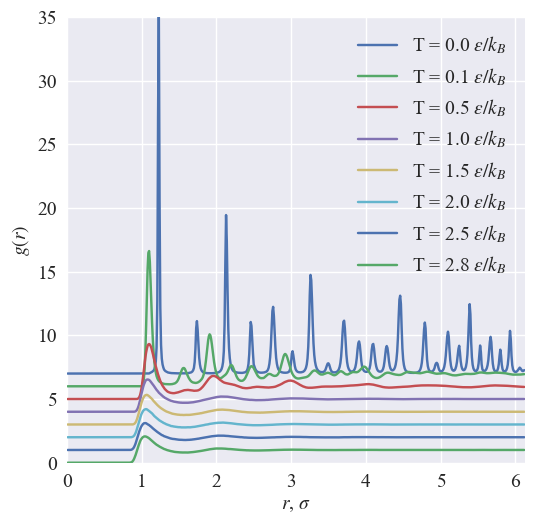

In [9]:

plt.rcParams['font.size'] = 14
for i, temperature in enumerate(temperatures):
    plt.plot(
        rdf_data['radius'],
        rdf_data[f'{temperature:.5f}'] + 1 * (len(temperatures) - (i + 1)), 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel('$r$, $\sigma$');
plt.ylabel('$g(r)$');
plt.xlim(
    left=0, 
    right=6.125,
);
plt.ylim(
    bottom=0, 
    top=35,
);
plt.legend();

save_plot(f'rdf_{plot_filename_postfix}.png')

#### Временная зависимость среднеквадратичного смещения $\left<\Delta r^2(t)\right>$ при различных температурах

$$\left<\Delta r^2(t)\right>=\dfrac{1}{N}\sum_{i=1}^{N}{\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2}$$

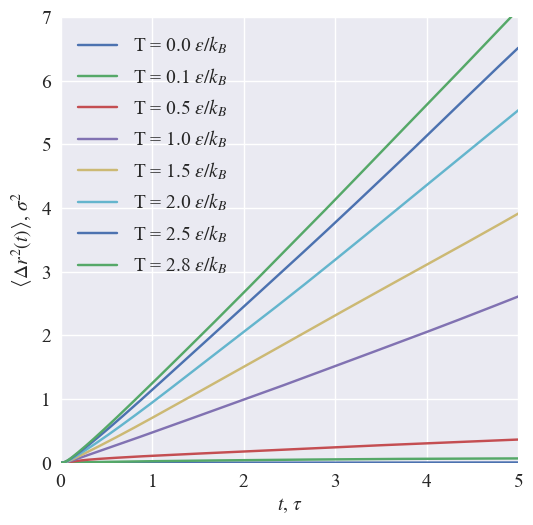

In [10]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        msd_data['time'],
        msd_data[f'{temperature:.5f}'], 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel(r'$t$, $\tau $');
plt.ylabel(r'$\left<\Delta r^2(t)\right>$, $\sigma^2$');
plt.xlim(
    left=0, 
    right=5,
);
plt.ylim(
    bottom=0, 
    top=7,
);
plt.legend();

save_plot(f'msd_{plot_filename_postfix}.png')

#### Временная зависимость автокорреляционнной функции скорости $\Psi(t)$ при различных температурах

$$\Psi(t) = \dfrac{1}{N}\left<\sum_{j=1}^N{\vec{v}_j(t)\vec{v}_j(0)}\right>$$

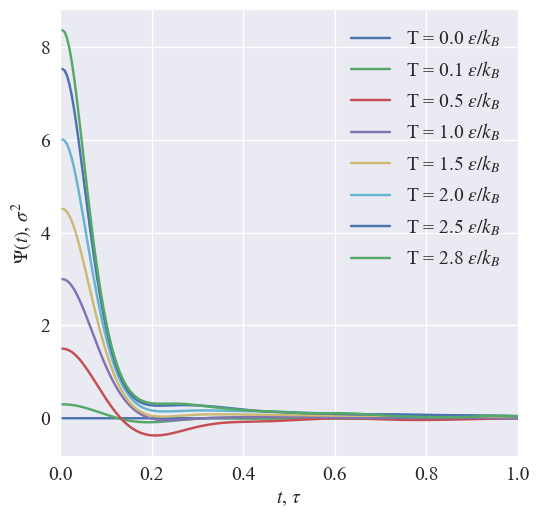

In [11]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        vel_autocor_data['time'],
        vel_autocor_data[f'{temperature:.5f}'], 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel(r'$t$, $\tau $');
plt.ylabel(r'$\Psi(t)$, $\sigma^2$');
plt.xlim(
    left=0, 
    right=1,
);
plt.ylim(
#     bottom=0, 
#     top=20,
);
plt.legend();

save_plot(f'vel_autocorr_{plot_filename_postfix}.png')

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Эйнштейна, при различных температурах

$$D_E(t)=\dfrac{\left<\left<\Delta r^2\right>\right>}{6t}=\dfrac{1}{6tN}\left<\sum_{i=1}^{N}\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2\right>$$

$$D=\lim_{t\rightarrow\infty}{D_E(t)}$$

In [12]:
einstein_diffusion = np.zeros(len(temperatures), dtype=np.float)
green_kubo_diffusion = np.zeros(len(temperatures), dtype=np.float)

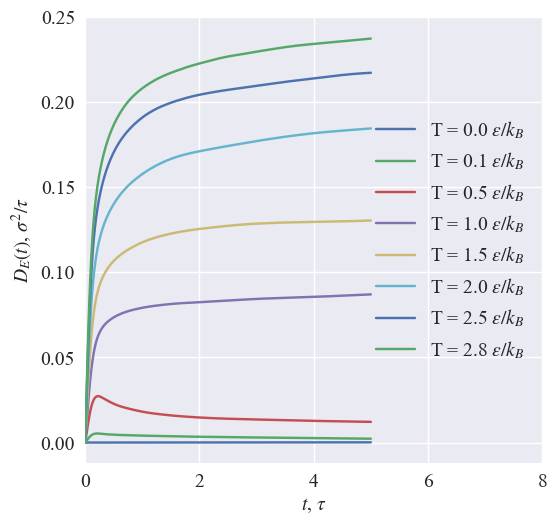

In [13]:
for i, temperature in enumerate(temperatures):
    diff_data = einstein_diffusion_data[f'{temperature:.5f}'].values
    plt.plot(
        einstein_diffusion_data['time'].values,
        diff_data, 
        label=f'T = {temperature:.1f} $\epsilon / k_B$',
    );
    einstein_diffusion[i] = diff_data[-1]
    
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'$D_E(t)$, $\sigma^2 / \tau$');
plt.xlim(
    left=0, 
    right=8,
);
plt.ylim(
#     bottom=0, 
    top=0.25,
);
plt.legend();

save_plot(f'diffusion_einstein_{plot_filename_postfix}.png')

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Грина-Кубо, при различных температурах

$$D_{GK}(t)=\dfrac{1}{3}\int_{0}^{t}{\Psi(\tau)d\tau}=\dfrac{1}{3N}\int_{0}^{t}{\left<\sum_{j=1}^N{\vec{v}_j(\tau)\vec{v}_j(0)}\right>d\tau}$$

$$D=\lim_{t\rightarrow\infty}{D_{GK}(t)}$$

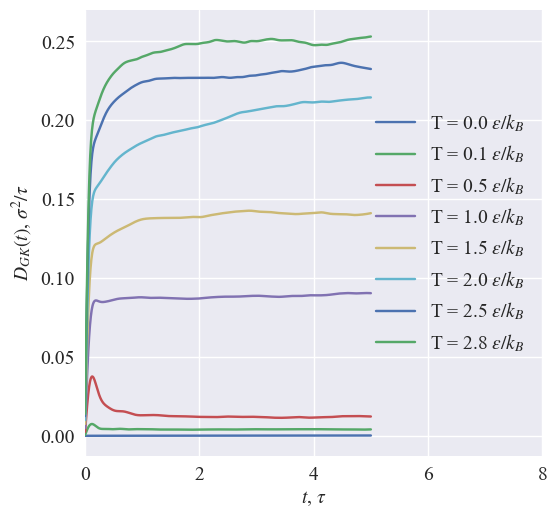

In [14]:
for i, temperature in enumerate(temperatures):
    diff_data = green_kubo_diffusion_data[f'{temperature:.5f}'].values
    plt.plot(
        green_kubo_diffusion_data['time'].values,
        diff_data, 
        label=f'T = {temperature:.1f} $\epsilon / k_B$',
    );
    green_kubo_diffusion[i] = diff_data[-1]
    
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'$D_{GK}(t)$, $\sigma^2 / \tau$');
plt.xlim(
    left=0, 
    right=8,
);
plt.ylim(
#     bottom=0, 
    top=0.27,
);
plt.legend();

save_plot(f'diffusion_green_kubo_{plot_filename_postfix}.png')

#### Сравнение коэффициентов самодиффузии, вычисленных через соотношения Эйнштейна и Грина-Кубо

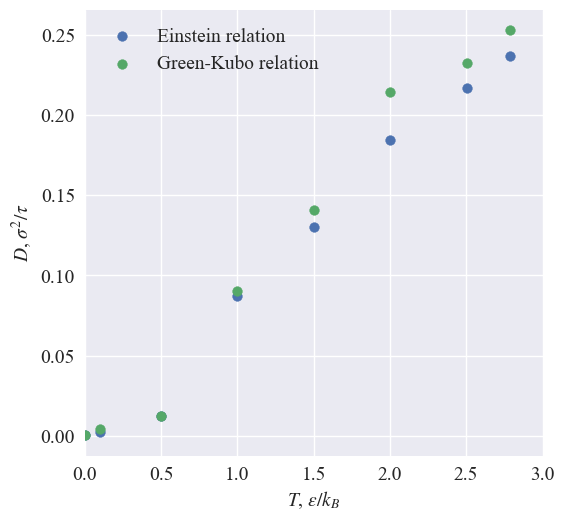

In [15]:
plt.scatter(
    np.array(temperatures),
    einstein_diffusion, 
    label='Einstein relation',
);
plt.scatter(
    np.array(temperatures),
    green_kubo_diffusion, 
    label='Green-Kubo relation',
); 
plt.xlabel(r'$T$, $\epsilon / k_B$');
plt.ylabel(r'$D$, $\sigma^2 / \tau$');
plt.xlim(
    left=0, 
    right=3,
);
plt.ylim(
#     bottom=0, 
#     top=0.1,
);
plt.legend(markerscale=1);


save_plot(f'diffusion_comparing_{plot_filename_postfix}.png')

#### Извлечение параметров системы из файла

In [16]:
system_parameters = pd.read_csv(parameters_filename, sep=';')

for column in system_parameters.columns:
    system_parameters[column] = system_parameters[column].round(5)

system_parameters

,temperature,pressure,system_kinetic_energy,potential_energy,total_energy,virial,msd,diffusion
0,0.00000,-2.93926,0.20579,-7985.80600,-7985.80600,-16209.44200,0.00000,0.00000
1,0.00010,-2.93916,0.41151,-7985.08001,-7984.87422,-16209.28548,0.00000,0.00000
2,0.00020,-2.93909,0.61705,-7985.08657,-7984.67506,-16209.28603,0.00000,0.00000
3,0.00030,-2.93901,0.82243,-7985.08561,-7984.46856,-16209.26266,0.00000,0.00000
4,0.00040,-2.93893,1.02765,-7985.08303,-7984.26060,-16209.23917,0.00000,0.00000
...,...,...,...,...,...,...,...,...
39995,2.80616,4.59792,5766.51973,-4973.58831,801.47949,13806.45672,185.52650,0.15462
39996,2.80200,4.60721,5753.95176,-4965.14476,801.37497,13874.77483,185.54383,0.15463
39997,2.79589,4.63126,5741.02935,-4943.42698,810.52479,14032.54681,185.56120,0.15464
39998,2.78962,4.66448,5733.12021,-4914.06165,826.96770,14241.62761,185.57873,0.15465


In [17]:
times = (system_parameters.index + 1) * 0.005

#### Зависимость температуры системы от времени

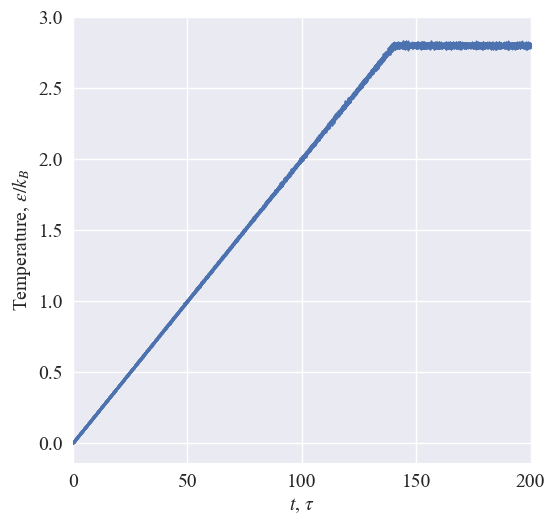

In [18]:
plt.scatter(
    times,
    system_parameters['temperature'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Temperature, $\epsilon / k_B$');

plt.xlim(
    left=0,
    right=200,
);
plt.ylim(
#     bottom=2.75,
    top=3,
);

save_plot(f'temperature_{plot_filename_postfix}.png')

#### Зависимость давления системы от времени

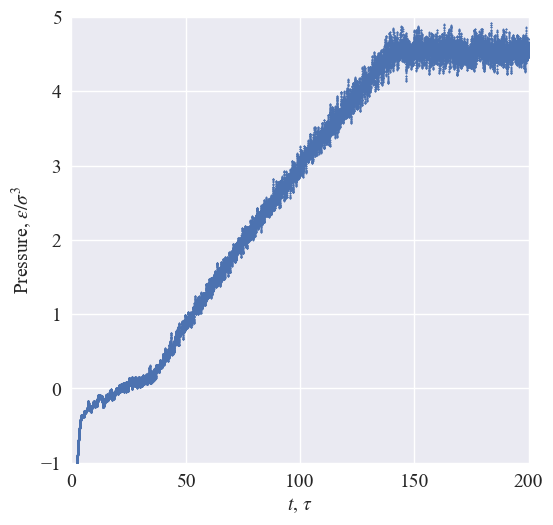

In [19]:
plt.scatter(
    times,
    system_parameters['pressure'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Pressure, $\epsilon / \sigma^3 $');

plt.xlim(
    left=0,
    right=200,
);
plt.ylim(
    bottom=-1,
    top=5,
);
save_plot(f'pressure_{plot_filename_postfix}.png')

#### Зависимость кинетической энергии системы от времени

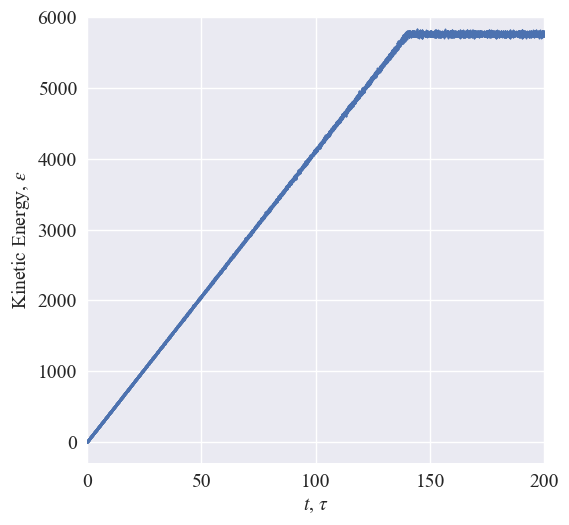

In [20]:
plt.scatter(
    times,
    system_parameters['system_kinetic_energy'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Kinetic Energy, $\epsilon$');

plt.xlim(
    left=0,
    right=200,
);
plt.ylim(
#     bottom=-1,
    top=6000,
);
save_plot(f'kinetic_energy_{plot_filename_postfix}.png')

#### Зависимость потенциальной энергии системы от времени

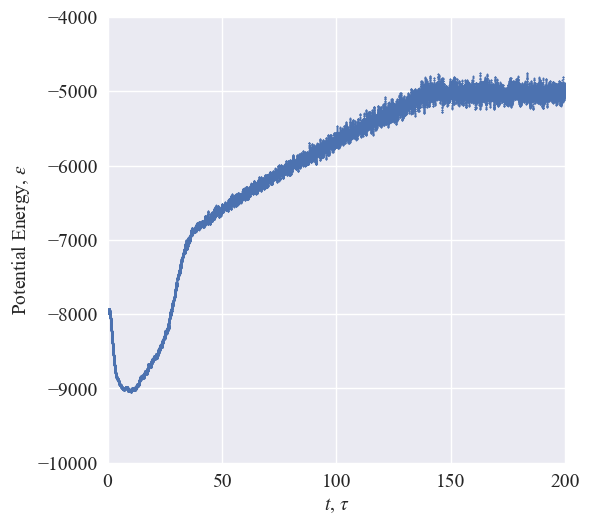

In [21]:
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Potential Energy, $\epsilon$');

plt.xlim(
    left=0,
    right=200,
);
plt.ylim(
    bottom=-10000,
    top=-4000,
);
save_plot(f'potential_energy_{plot_filename_postfix}.png')

#### Зависимость полной энергии системы от времени

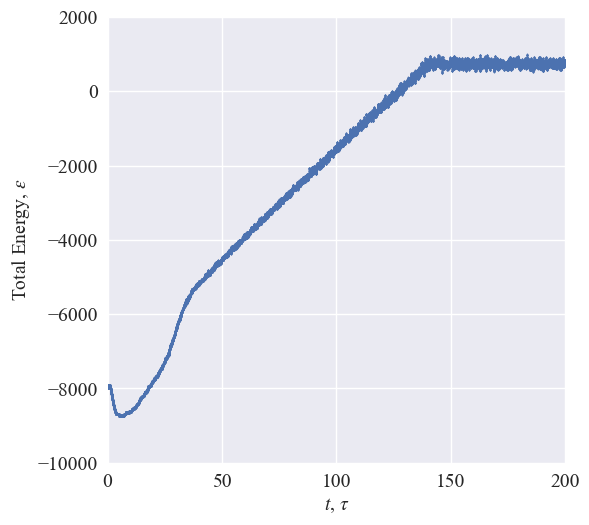

In [22]:
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Total Energy, $\epsilon$');

plt.xlim(
    left=0,
    right=200,
);
plt.ylim(
    bottom=-10000,
    top=2000,
);
save_plot(f'total_energy_{plot_filename_postfix}.png')

#### Энергии на одном графике

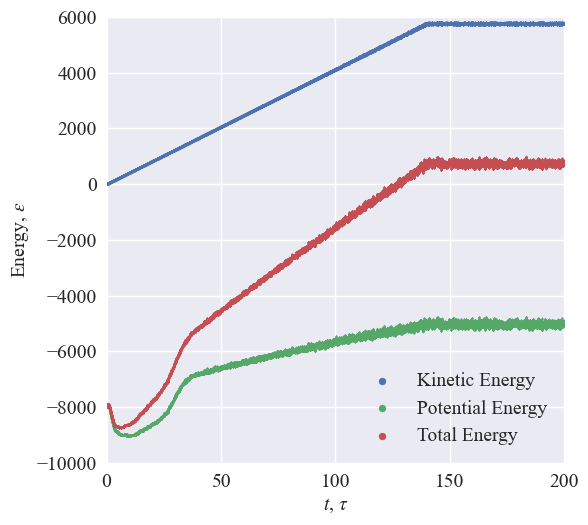

In [23]:
plt.scatter(
    times,
    system_parameters['system_kinetic_energy'],
    s=1,
    label='Kinetic Energy',
);
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
    label='Potential Energy',
);
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
    label='Total Energy',
);

plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Energy, $\epsilon$');
plt.legend(markerscale=5);

plt.xlim(
    left=0,
    right=200,
);
plt.ylim(
    bottom=-10000,
    top=6000,
);
save_plot(f'all_energies_{plot_filename_postfix}.png')